In [2]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten

In [3]:
directories=os.listdir('data')
print(directories)

['astilbe', 'bellflower', 'black_eyed_susan', 'calendula', 'california_poppy', 'carnation', 'common_daisy', 'coreopsis', 'dandelion', 'iris', 'rose', 'sunflower', 'tulip', 'water_lily']


In [4]:
images_count=0
for directory in directories:
    files=list(os.listdir('data/'+ directory))
    print(directory+' has '+str(len(files))+' images')
    images_count+=len(files)

astilbe has 726 images
bellflower has 872 images
black_eyed_susan has 986 images
calendula has 1011 images
california_poppy has 1021 images
carnation has 924 images
common_daisy has 978 images
coreopsis has 1035 images
dandelion has 1038 images
iris has 1041 images
rose has 986 images
sunflower has 1013 images
tulip has 1034 images
water_lily has 977 images


In [5]:
base_directory='data/'
img_height = 180
img_width = 180
batch_size = 32

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_directory,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch_size,
                                                       image_size=(img_width,img_height))

val_ds = tf.keras.utils.image_dataset_from_directory( base_directory,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch_size,
                                                       image_size=(img_width,img_height))

Found 13642 files belonging to 14 classes.
Using 10914 files for training.
Found 13642 files belonging to 14 classes.
Using 2728 files for validation.


In [7]:
flower_names = train_ds.class_names
flower_names

['astilbe',
 'bellflower',
 'black_eyed_susan',
 'calendula',
 'california_poppy',
 'carnation',
 'common_daisy',
 'coreopsis',
 'dandelion',
 'iris',
 'rose',
 'sunflower',
 'tulip',
 'water_lily']

In [8]:
import matplotlib.pyplot as plt

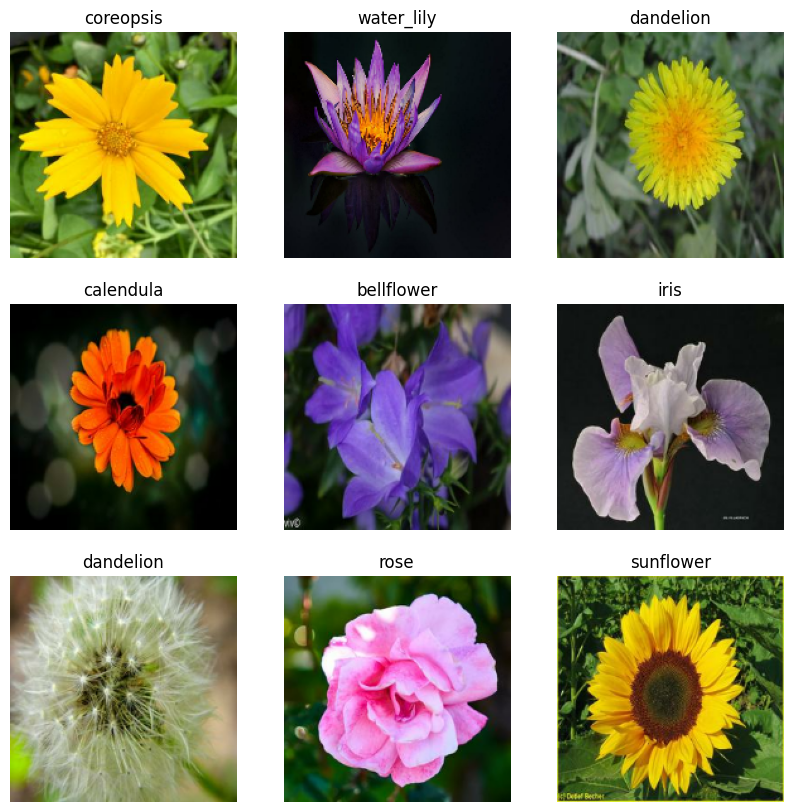

In [9]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

In [11]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [12]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [14]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_width,img_height,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

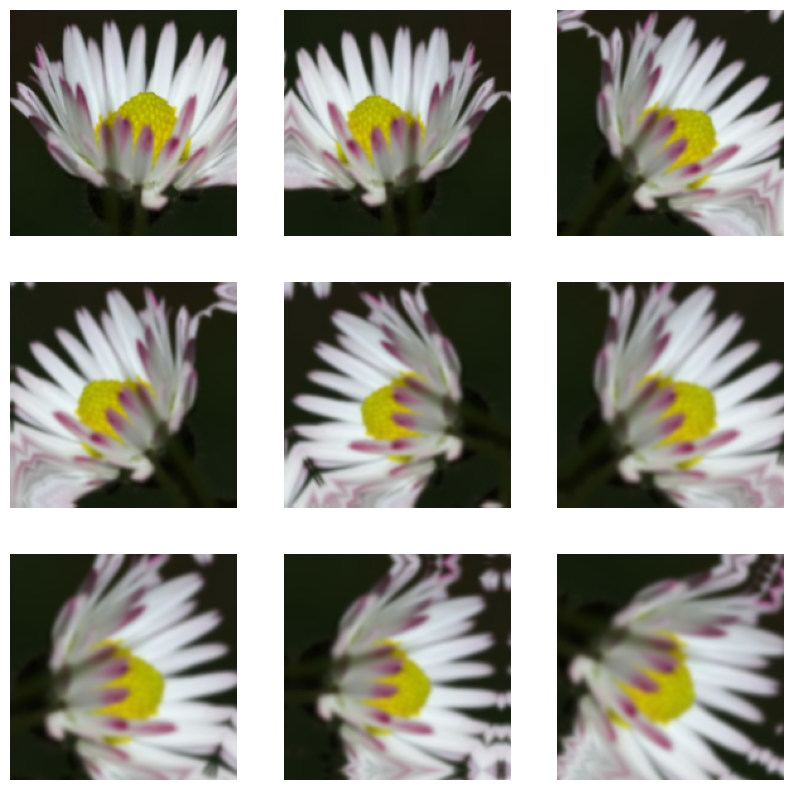

In [15]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [29]:
num_classes = len(flower_names)

model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPool2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPool2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPool2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes)
])

In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 14)                  │           1,806 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,990,446 (15.22 MB)

 Trainable params: 3,990,446 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 53s 151ms/step - accuracy: 0.3492 - loss: 1.8946 - val_accuracy: 0.5572 - val_loss: 1.2851
Epoch 2/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 62s 182ms/step - accuracy: 0.5564 - loss: 1.2852 - val_accuracy: 0.6129 - val_loss: 1.1363
Epoch 3/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 65s 190ms/step - accuracy: 0.6168 - loss: 1.1240 - val_accuracy: 0.6591 - val_loss: 1.0034
Epoch 4/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 72s 210ms/step - accuracy: 0.6516 - loss: 1.0100 - val_accuracy: 0.6554 - val_loss: 1.0032
Epoch 5/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 59s 173ms/step - accuracy: 0.6795 - loss: 0.9212 - val_accuracy: 0.6928 - val_loss: 0.9131
Epoch 6/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 66s 194ms/step - accuracy: 0.7248 - loss: 0.8090 - val_accuracy: 0.6880 - val_loss: 0.9039
Epoch 7/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 69s 203ms/step - accuracy: 0.7358 - loss: 0.7683 - val_accuracy: 0.7126 - val_loss: 0.8662
Epoch 8/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 63s 185ms/step - accuracy: 0.7515 - loss: 0

In [34]:
data_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)